# Artificial Neural Networks (ANN): Redes neuronales artificiales.

Adjunto en la pagina virtual unas notas sobre combinatoria que sirven para ayudar a entender la importancia de las redes neuronales.

## Introduccion
* Las ANN son algoritmos que superan por lejos la regresion, por la capacidad de manejar datos de gran tamanho y la capacidad de modelar cosas que no son lineales.
* Las ANN son
[universal approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Que quiere decir esto?
Esto quiere decir que "cualquier" funcion (campo vectorial)
$f: \mathbb{R}^n \to \mathbb{R}^m $ puede ser aproximada tanto como se quiera con una red neuronal de profundidad (numero de capas) data $d= \max \{ n+1, m \}$.  Es "cualquier" desde el punto de vista practico, la excepciones son funciones raras que se inventan los matematicos y que no tienen utilidad practica.
"Cualquier" incluye las funciones continuas, diferenciables, integrables, etc.
* Con ANN se pueden hacer muchas cosas:
    * Interpretacion o manejo de videos
    * Interpretacion o manejo de audios
    * Language translation
    * Autonomous driving (carros autonomos)
    * Pronostico de enfermedades
    * OCR: Optical Character Regonition
    * Reconocimiento de imagenes
    * Prediccion de la siguiente palabra, frase.
    * Por ejemplo: tengo dos estudiantes (Jessica y Sebastian), la tesis de doctorado usa ANN para predecir si un estudiante va a pasar o no una prueba matematica con geometria dinamica.
    * La lista es internable.
    * La inteligencia artificial generativa: Deep Fake ?
    * Large Language Models (ChatGPT)
    * GANs: Generative Adversary Networks.


Para poder apreciar el tipo de problemas que se pueden presentar y que ANN los puede resolver sin tanto uso de memoria o CPU (GPU, TPU). Vamos a formular un ejemplo.

* **Ejemplo 1:** Asuma que tenemos una imagen de $100 \times 100$ pixeles (que no es grande, e incluso de un solo canal. Color gris, por que si es de colores seria RGB Reed Green Blue, tres canales, o HSV, HSL, CMYK "cuatro caneales: Cyan-Magenta, Yello and Black) y que queremos usar regresion logistica con un polinomio no lineal. El proximo proyecto, para la proxima semana, es regresion logistica lineal ($\Theta^T X)$
y funciona con el MNIST (Modified National INstitude of Standards) en una base de datos de digitos escritos a mano por empleados de la oficina postal de USA y la parte modificada es por que metieron despues estudiantes de high shool.
Queremos usar el polinomio no lineal de grado mas bajo. Es decir de grado 2.  Cuantos $theta$'s se necesitan?

Pensemos en un polinomio de grado 2 con n variables

$$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n + \theta_{n+1} x_1 x_2 + \cdots + \theta_m x_{n-1} x_n + \theta_{m+1} x_1^2 + \theta_{m+2} x_2^2 + \theta_q x_n^2 $$









Les hable de combinatoria por que el numero de terminos de un polinomio de grado $n$ en $k$ variables esta dado por

$$\binom{n+k}{k} = \frac{(n+k)! }{k! n!} = \frac{(n+1)(n+2) \cdots (n+k)}{k!} \tag{1} $$

Un ejemplo. Cuente el numero de terminos de un polinomio de grado 2 en 2 variables.

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x^2 $$
Respuesta $6$
Apliquemos la formula 1, $n=2, k=2$, $n+k=4$
$$\binom{4}{2} = \frac{4!}{2! 2!} = \frac{4 \times 3 \times 2!}{2! 2!} = \frac{12}{2} = 6 $$.


Volvamos al problema de la figura de $100 \times 100 $ pixeles. Cada pixel es un parametro, es una variable. Entonces tenemos 10mil variables. El polinomio no lineal mas peuquenho es orden 2.  Si aplicacmos la formual $n=10000$, $k=2$,

$$\binom{10002}{1000}= \frac{1002 \times 1001 \times 1000!}{1000! 2!} = \frac{10001 \times 10002}{2} =50015001 $$
Es mucho peor si el polinomio es de grado 3

$$\binom{10003}{3} = \frac{(1003)(10002)(10001)}{5}=1.6721682001 × 10^{10} $$

El problema es mucho mas grande por que si $q$ es el numero de terminos del polinomio, si pensaramos en una regresion lineal
la matriz $X$ (de datos) tendria un tamanho $p \times q$,
y generalmente $p$ es mayor que $q$. Si pensamos que son iguales $p=q$ estariamos hablando de mas de $10^{20}$ entradas en la matriz. Ya esto se sale de la capacidad actual de computacion.

Se descarta, por obvias razones, la regresion lineal en problemas de este tipo.


## Historia
* [Santiago Ramon y Cajal](https://es.wikipedia.org/wiki/Santiago_Ram%C3%B3n_y_Cajal) fue pionero en el descubrimiento de las neuronas biligicas (approx 1908).
* En 1943, dos cientificos un matematico (Walter Pits) y un neurofisiologo (Warren McCulloh) disenharon un modelo biologico que simularia el funcionamiento del cerebro con circuitos logicos. De aca sale el modelo McCulloh-Pits del cual vamos a ver ejemplos.

* En 1950s, en 1958  Frank Rosenblatt invento lo que se conoce hoy como el **Perceptron**. La publicacion es de 1962.
Este el precursor de las redes neuronales modernas. Buscar
por MLP.

* AI winter (invierno del AI). Fue una epoca de **oscurantismo** en la AI. Habia desconfianza, habia miedo, incredulidad, etc. desde aproximadamente 1967 al 1988 (mas o menos).

[AI winter aca](https://en.wikipedia.org/wiki/AI_winter)

* Backpropagation: Propagacion hacia atras, tiene historia de origenes en 1960s, pero en los 1990's ya implementaciones que muestran la efectividad. Sin propagacion hacia atras, las redes neuronales no sirven para nada. El concepto de **aprendizaje** esta metido en la "backpropagation".  Esto lo explico en dos semanas.

## Teoria
Voy a mostrar un ejemplo del **perceptron** de Rosenblatt
donde arranca la teoria, y luego les muestro un modelo de una neurona biologica con el fin de comparar



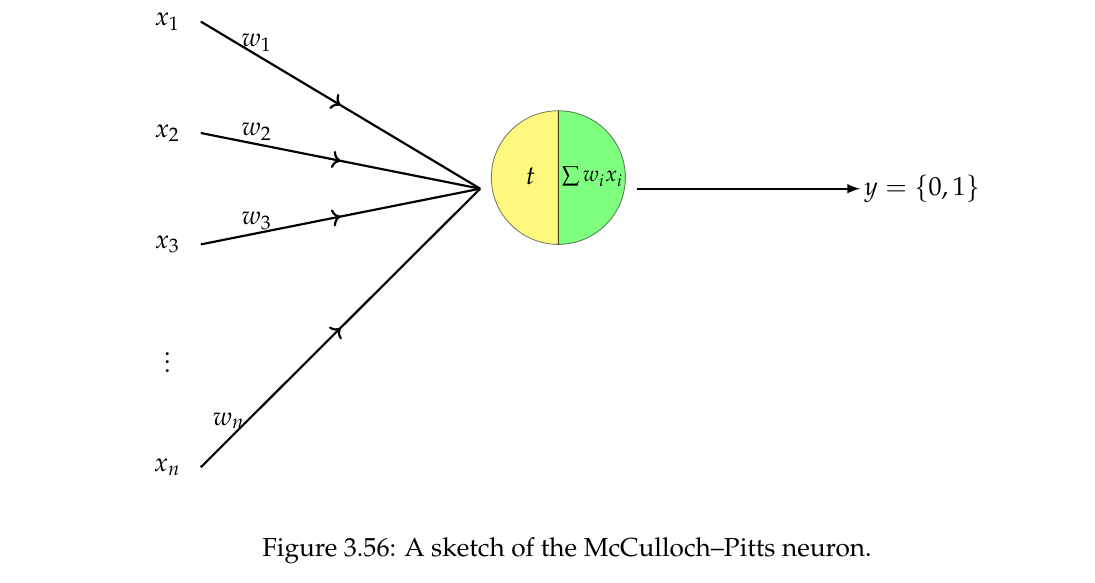

Piense en la siguiente idea:

Queremos hacer un viaje. Pero hay muchos parametros:

Datos $x$
* Distancia al destino
* modo de transporte: carro, avion, barco, a pie, etc.
* El clima del destino
* Costo

Parametros $\theta$ ($w$)
A cada uno de estos le asignamos un peso (weight)
* que tan lejos nos gusta viajar.
* que tanto miedo le tenemos a un avion, a un barco?
* que tanto dinero tenemos o queremos gastar
* que tan buenos somos para el clima frio o caliente.

A lo ultimo la decision se basa en dos cosas:

1. Calcular un suma ponderada de los datos con los pesos

$$ h(\theta, X) =  \sum_i \theta_i x_i  = X^T \Theta$$.

2. Decidimos con un umbral $t$. Si $h(\theta, X) > t$ vamos al paseo si no no vamos.

La figura es un McCulloch-Pitts neuron pero  tambien se puede ver como un Perceptron.

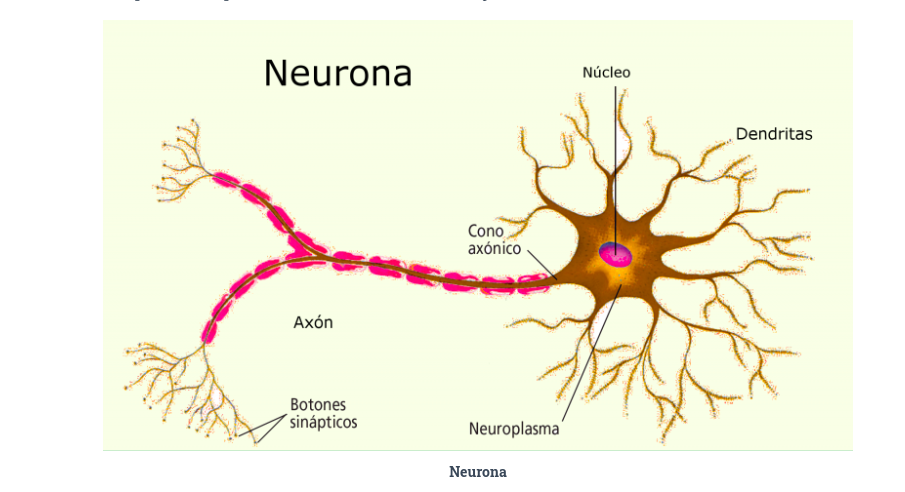

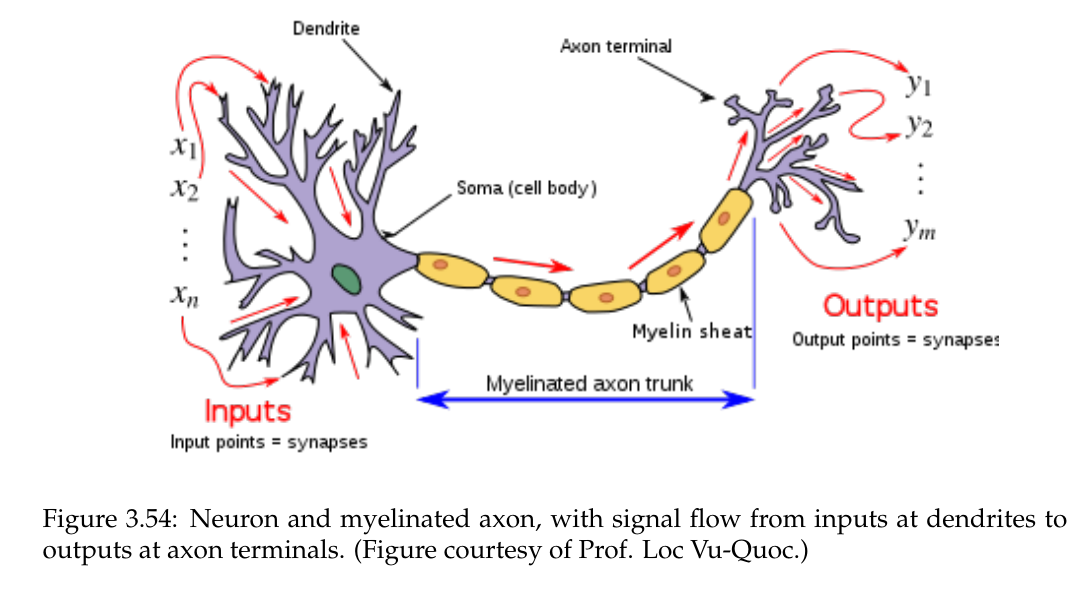

# Proxima semana: el modelo (neurona) de McCulloch-Pitts.